# Case Study: Investigating Insurance Fraud
Notebook Author: Santosh 
Email: santoshyadawprl@gmail.com
Contact: 92762180

## Problem Set 1

Develop Intelligent Model to identifty of any Fradulent claims.

Data url: https://www.kaggle.com/datasets/mastmustu/insurance-claims-fraud-data

### 1.1 Data Preparation

In [1]:
import os
import logging

import numpy as np
import pandas as pd
import scipy
from scipy.cluster import hierarchy as hc

import matplotlib.pyplot as plt
import seaborn as sns

logging.basicConfig(level=logging.INFO)

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [2]:
DIR = os.path.dirname(os.getcwd())
logging.info(f"Current working dir: {DIR}")

DATA_FOLDER = os.path.join(DIR, "data")
logging.info(f"Data folder: {DATA_FOLDER}")

EMPLOYEE_DATA_PATH = os.path.join(DATA_FOLDER, "raw", "employee_data.csv")
logging.info(f"EMPLOYEE_DATA_PATH: {EMPLOYEE_DATA_PATH}")

INSURANCE_DATA_PATH = os.path.join(DATA_FOLDER, "raw", "insurance_data.csv")
logging.info(f"INSURANCE_DATA_PATH: {INSURANCE_DATA_PATH}")

VENDOR_DATA_PATH = os.path.join(DATA_FOLDER, "raw", "vendor_data.csv")
logging.info(f"VENDOR_DATA_PATH: {VENDOR_DATA_PATH}")

INFO:root:Current working dir: C:\Users\santo\Desktop\Job Application\amplify_health\Case Study
INFO:root:Data folder: C:\Users\santo\Desktop\Job Application\amplify_health\Case Study\data
INFO:root:EMPLOYEE_DATA_PATH: C:\Users\santo\Desktop\Job Application\amplify_health\Case Study\data\raw\employee_data.csv
INFO:root:INSURANCE_DATA_PATH: C:\Users\santo\Desktop\Job Application\amplify_health\Case Study\data\raw\insurance_data.csv
INFO:root:VENDOR_DATA_PATH: C:\Users\santo\Desktop\Job Application\amplify_health\Case Study\data\raw\vendor_data.csv


In [3]:
# Load the datasets
employee_data = pd.read_csv(EMPLOYEE_DATA_PATH)
insurance_data = pd.read_csv(INSURANCE_DATA_PATH)
vendor_data = pd.read_csv(VENDOR_DATA_PATH)

## 1.2 Exploratory Data Analysis
Check relationship between dependent variables - any correlation?
check relationship between independent variables - any correlation?
Is the dataset skewed?

### Employee dataset

In [4]:
# Get basic statiscs - employee (those working on the insurane claims)
employee_data.head()

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,NaN,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,NaN,Panama City,FL,32404,107363763,OPIS19290040088204
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590
3,AGENT00004,Mary Smith,2004-09-23,235 Hugh Thomas Drive,NaN,Panama City,FL,32404,67563771,ZANG21285355574581
4,AGENT00005,Mildred Diaz,2011-06-21,3426 Broadview Street,NaN,Montgomery,AL,36110,114951317,DZFS82244494451134


In [5]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       179 non-null    object
 5   CITY                1193 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB


In [6]:
employee_data.describe()

,POSTAL_CODE,EMP_ROUTING_NUMBER
count,1200.000000,1.200000e+03
mean,50220.733333,7.098849e+07
std,33388.345995,3.446728e+07
min,1007.000000,1.002215e+07
25%,21103.500000,4.042720e+07
50%,37209.500000,7.252639e+07
75%,82510.250000,1.009398e+08
max,99577.000000,1.299226e+08


In [7]:
# Checking on number of unique employee id, name
len_unique_employees_id = len(employee_data["AGENT_ID"].unique())
print(f" Number of unique employees id: {len_unique_employees_id}")

len_unique_employees_name = len(employee_data["AGENT_NAME"].unique())
print(f" Number of unique employees name: {len_unique_employees_name}")

len_unique_employee_emp_routing = len(employee_data["EMP_ROUTING_NUMBER"].unique())
print(f" Number of unique emp routing : {len_unique_employee_emp_routing}")

len_unique_employee_emp_acc_num =  len(employee_data["EMP_ACCT_NUMBER"].unique())
print(f" Number of unique number emp acc num: {len_unique_employee_emp_acc_num}")


employee_data[employee_data["AGENT_NAME"].duplicated()]

 Number of unique employees id: 1200
 Number of unique employees name: 1198
 Number of unique emp routing : 1200
 Number of unique number emp acc num: 1200


,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
862,AGENT00863,Sarah Brown,1996-06-08,5436 Dorbrandt Street,#APT 000002,Anchorage,AK,99518,21384158,OLBB33201159859153
1126,AGENT01127,Robert Ward,1999-06-02,5150 West Eugie Avenue,#2021,Glendale,AZ,85304,31348760,KWFF64231400629759


<Axes: xlabel='count', ylabel='CITY'>

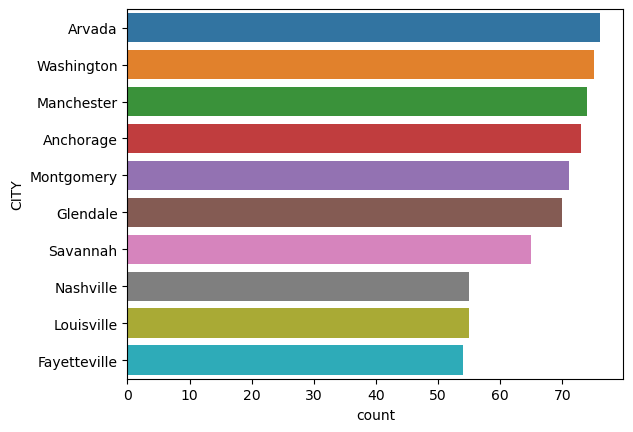

In [8]:
# Plot the distribution for city of employees (Top 10)
sns.countplot(y="CITY", data=employee_data, order=employee_data["CITY"].value_counts().iloc[:10].index)

<Axes: xlabel='count', ylabel='STATE'>

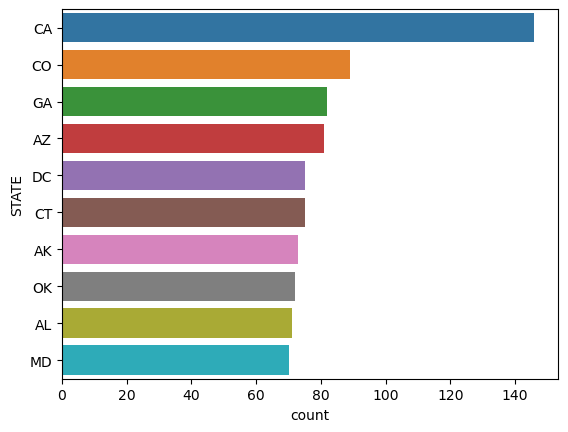

In [9]:
# Plot the distribution for state of employees (Top 10)
sns.countplot(y="STATE", data=employee_data, order=employee_data["STATE"].value_counts().iloc[:10].index)

<Axes: xlabel='count', ylabel='CITY'>

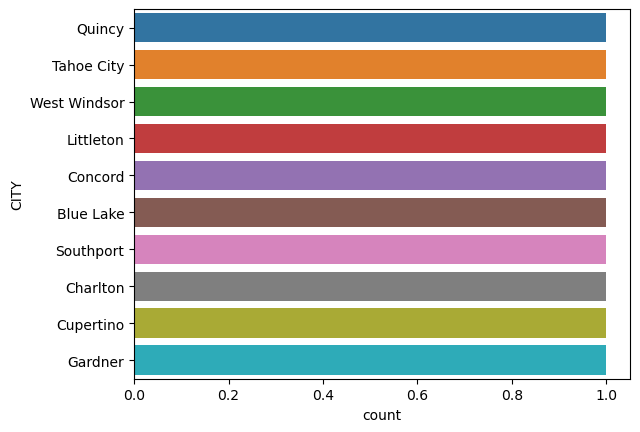

In [10]:
# Plot the distribution for city of employees (Bottom 10)
sns.countplot(y="CITY", data=employee_data, order=employee_data["CITY"].value_counts().iloc[-10:].index)

<Axes: xlabel='count', ylabel='STATE'>

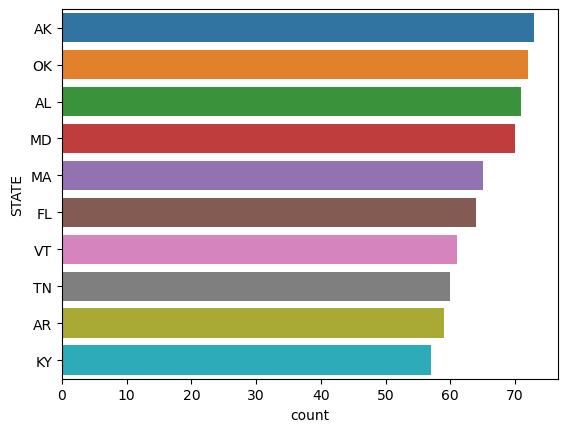

In [11]:
# Plot the distribution for city of employees (Bottom 10)
sns.countplot(y="STATE", data=employee_data, order=employee_data["STATE"].value_counts().iloc[-10:].index)

General Observations - Employee dataset
1. There are 9 columns in total - 7 being of string type and 2 being of integer type
2. Most of the columns are complete less ADDRESS_LINE2 and CITY with ADDRESS_LINE2 having the largest number of missing values. This is understandable as most of the address might already be contained in ADDRESS_LINE1
3. The number of unique employee id and employee name does not match.
4. Majority of the employees seem to be coming from states in California, Colorado, Georgia, Arizona with the largest coming from cities such as Arvada, Washington, Machester, Anchorage and Montometry. These are major big cities in the USA.
5. The least majority of the employees are coming from smaller states like Tennesie, Arkansas and Kentucky with the largest coming fromm small cities in the USA such as Blue Lake, Southport, Charton, Cupertino and Gardner

### Vendor dataset

In [12]:
# Get basic statiscs - vendor (those assiting insurance comapnies in investigating insurane claims)
vendor_data.head()

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703
1,VNDR00002,Garcia Ltd,5701 East Shirley Lane,NaN,Montgomery,AL,36117
2,VNDR00003,Cherry LLC,1217 Cottondale Road,NaN,Montgomery,AL,36109
3,VNDR00004,Mays-Benson,227 West Montgomery Cross Road,#736,Savannah,GA,31406
4,VNDR00005,Wilson PLC,23 North Hill Street,NaN,Nashville,TN,37210


In [13]:
vendor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   ADDRESS_LINE2  97 non-null     object
 4   CITY           594 non-null    object
 5   STATE          600 non-null    object
 6   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


In [14]:
vendor_data.describe()

,POSTAL_CODE
count,600.000000
mean,48897.900000
std,32595.256693
min,1028.000000
25%,21122.000000
50%,37211.000000
75%,80003.250000
max,99603.000000


In [15]:
vendor_data.head()

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703
1,VNDR00002,Garcia Ltd,5701 East Shirley Lane,NaN,Montgomery,AL,36117
2,VNDR00003,Cherry LLC,1217 Cottondale Road,NaN,Montgomery,AL,36109
3,VNDR00004,Mays-Benson,227 West Montgomery Cross Road,#736,Savannah,GA,31406
4,VNDR00005,Wilson PLC,23 North Hill Street,NaN,Nashville,TN,37210


In [16]:
# Checking on number of unique employee id, name
len_unique_vendor_id = len(vendor_data["VENDOR_ID"].unique())
print(f" Number of unique vendor id: {len_unique_vendor_id}")

len_unique_vendor_name = len(vendor_data["VENDOR_NAME"].unique())
print(f" Number of unique vendor name: {len_unique_vendor_name}")

vendor_data[vendor_data["VENDOR_NAME"].duplicated()]

 Number of unique vendor id: 600
 Number of unique vendor name: 589


,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
181,VNDR00182,Jones Group,5116 Feys Court,NaN,Louisville,KY,40216
235,VNDR00236,Davis PLC,11 Proctor Circle,NaN,Peabody,MA,1960
286,VNDR00287,Thompson Inc,813 Holt Grove Court,NaN,Nashville,TN,37211
458,VNDR00459,Smith Inc,1852 Cherry Road,NaN,Annapolis,MD,21409
467,VNDR00468,Hernandez Inc,2464 Windham Hill Road,NaN,Townshend,VT,5359
496,VNDR00497,Anderson Inc,6208 Ingalls Street,NaN,Arvada,CO,80003
503,VNDR00504,Hill LLC,8467 Chase Drive,NaN,Arvada,CO,80003
513,VNDR00514,Smith Group,14 Short Circle,NaN,Conway,AR,72032
537,VNDR00538,Johnson LLC,5708 West Union Hills Drive,NaN,Glendale,AZ,85308
538,VNDR00539,Anderson Inc,35 Pilot Knob Lane,#204,Telluride,CO,81435


<Axes: xlabel='count', ylabel='CITY'>

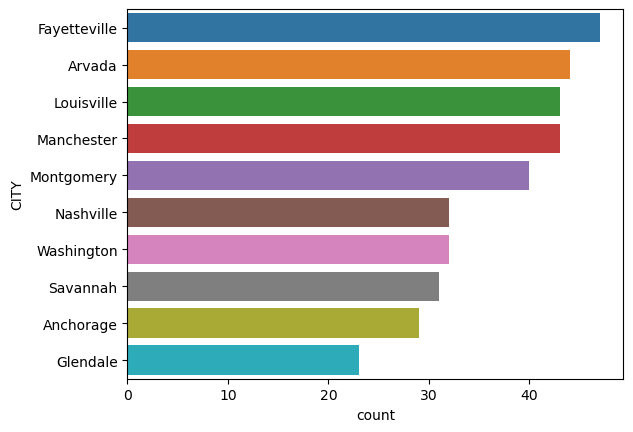

In [17]:
# Plot the distribution for city of vendor (Top 10)
sns.countplot(y="CITY", data=vendor_data, order=vendor_data["CITY"].value_counts().iloc[:10].index)

<Axes: xlabel='count', ylabel='STATE'>

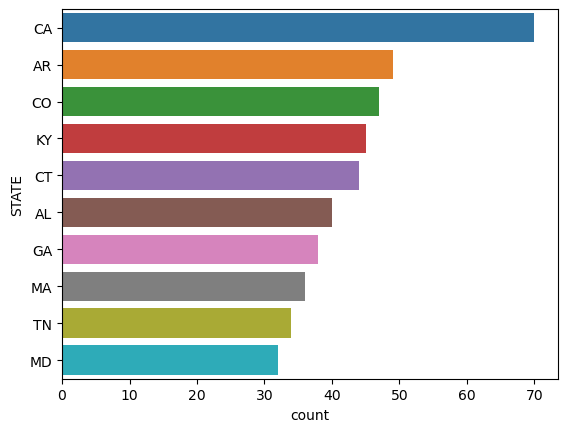

In [18]:
# Plot the distribution for state of vendor (Top 10)
sns.countplot(y="STATE", data=vendor_data, order=vendor_data["STATE"].value_counts().iloc[:10].index)

<Axes: xlabel='count', ylabel='CITY'>

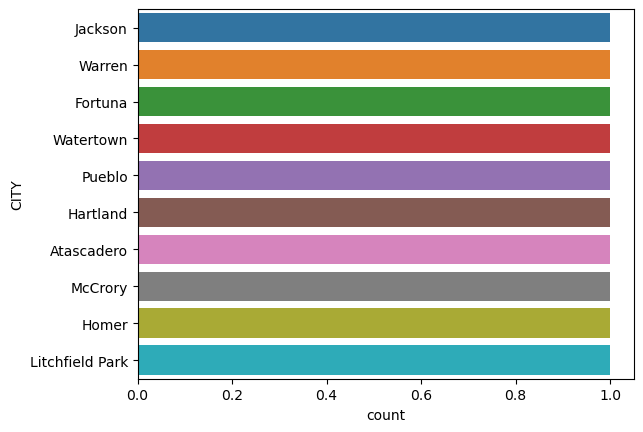

In [19]:
# Plot the distribution for city of vendor (Bottom 10)
sns.countplot(y="CITY", data=vendor_data, order=vendor_data["CITY"].value_counts().iloc[-10:].index)

<Axes: xlabel='count', ylabel='STATE'>

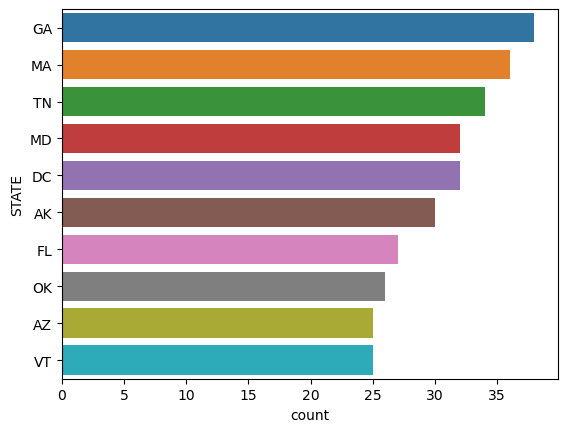

In [20]:
# Plot the distribution for city of vendor (Bottom 10)
sns.countplot(y="STATE", data=vendor_data, order=vendor_data["STATE"].value_counts().iloc[-10:].index)

General Observations - Vendor dataset
1. There are 7 columns in total - 6 being of string type and 1 being of integer type
2. Most of the columns are complete less ADDRESS_LINE2 and CITY with ADDRESS_LINE2 having the largest number of missing values. This is understandable as most of the address might already be contained in ADDRESS_LINE1. Similar as whaqt we saw with employee data
3. There are no overlapping between the vendor id and vendor name
4. Majority of the vendor seem to be coming from states in California, Colorado, Georgia, Arizona with the largest coming from cities such as Fayteville, Arvada, Lousiville, Machester, Anchorage and Montometry. These are major big cities in the USA.
5. The least majority of the vendors are coming from smaller states like Georgia, Massachusetts, Tennessee with the smallest coming from small cities in the USA such as Atascadero, McCrory, Homer, Litchfield.

### Insurance dataset

In [21]:
# Get basic statiscs - insurance (claims level transaction)
insurance_data.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [22]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

In [23]:
# Find the descriptive statistics for the numercal values
insurance_data.describe()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,POSTAL_CODE,AGE,TENURE,NO_OF_FAMILY_MEMBERS,ROUTING_NUMBER,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,88.508595,16563.830000,48288.830500,44.466100,62.949800,4.488400,7.052882e+07,0.699100,0.692800,11.604000
std,48.315874,22037.489735,32467.389801,11.516827,32.890604,1.712588,3.451879e+07,0.458672,0.461356,6.877101
min,6.000000,100.000000,1001.000000,25.000000,6.000000,2.000000,1.000074e+07,0.000000,0.000000,0.000000
25%,62.015000,2000.000000,21061.000000,34.000000,34.000000,3.000000,4.071761e+07,0.000000,0.000000,6.000000
50%,88.835000,7000.000000,37206.000000,45.000000,64.000000,4.000000,7.036614e+07,1.000000,1.000000,12.000000
75%,121.902500,21000.000000,80004.000000,54.000000,92.000000,6.000000,1.000638e+08,1.000000,1.000000,18.000000
max,200.000000,100000.000000,99669.000000,64.000000,119.000000,7.000000,1.299981e+08,1.000000,1.000000,23.000000


<Axes: xlabel='count', ylabel='CLAIM_STATUS'>

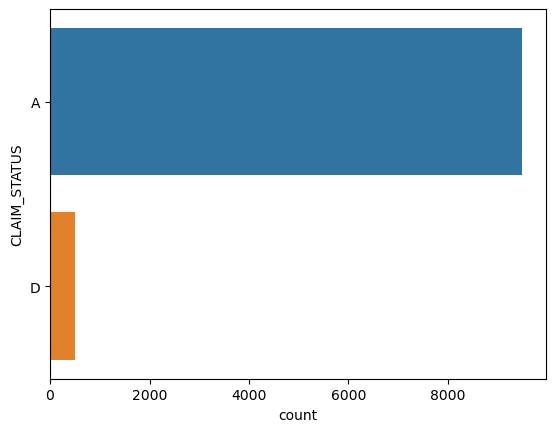

In [24]:
# Get the distribution of target variable - claim status
sns.countplot(y="CLAIM_STATUS", data=insurance_data)

In [25]:
# Cheapest insurance premium
insurance_data[insurance_data["PREMIUM_AMOUNT"]==6]

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
1324,2020-07-23 00:00:00,TXN00001325,A00007495,PLC00003516,2015-07-01,2020-07-19,2020-07-20,Mobile,6.0,600,...,A,Major Loss,Ambulance,1,1,OK,Oklahoma City,12,AGENT00717,NaN


In [26]:
# Tenture of 119 years
insurance_data[insurance_data["TENURE"]==119]["INSURANCE_TYPE"].value_counts()

Property    20
Health      19
Life        18
Mobile      17
Travel      16
Motor       12
Name: INSURANCE_TYPE, dtype: int64

[Text(0, 0, '1692'),
 Text(0, 0, '1692'),
 Text(0, 0, '1690'),
 Text(0, 0, '1682'),
 Text(0, 0, '1670'),
 Text(0, 0, '1574')]

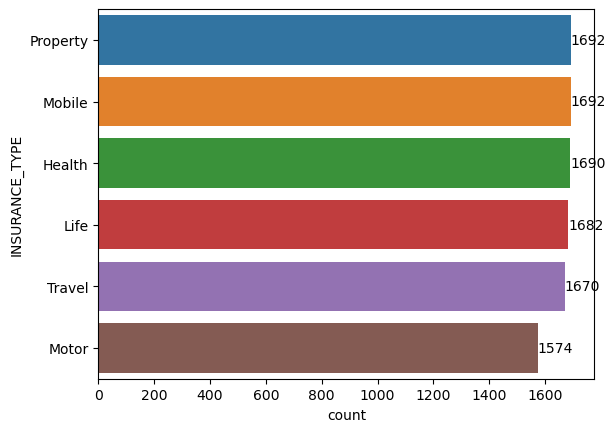

In [27]:
# Finding the Top 3 Insurance Type with the most insurance claims
ax1 = sns.countplot(y="INSURANCE_TYPE", data=insurance_data, order=insurance_data["INSURANCE_TYPE"].value_counts().index)
ax1.bar_label(ax1.containers[0])

[Text(0, 0, '4395'), Text(0, 0, '4150'), Text(0, 0, '1455')]

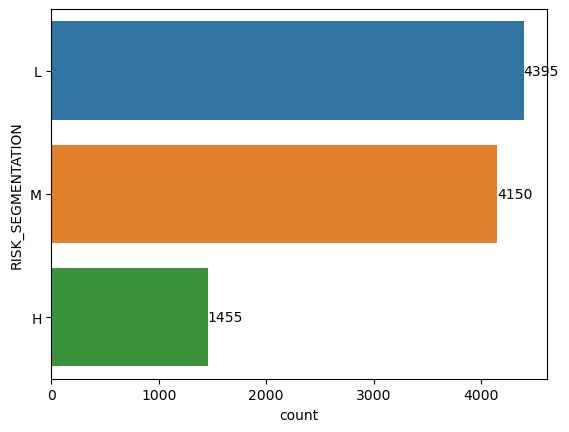

In [28]:
#  Finding which risk is the highest
ax2 = sns.countplot(y="RISK_SEGMENTATION", data=insurance_data, order=insurance_data["RISK_SEGMENTATION"].value_counts().index)
ax2.bar_label(ax2.containers[0])

[Text(0, 0, '148'),
 Text(0, 0, '105'),
 Text(0, 0, '104'),
 Text(0, 0, '100'),
 Text(0, 0, '97'),
 Text(0, 0, '95'),
 Text(0, 0, '92'),
 Text(0, 0, '92'),
 Text(0, 0, '88'),
 Text(0, 0, '86'),
 Text(0, 0, '83'),
 Text(0, 0, '81'),
 Text(0, 0, '76'),
 Text(0, 0, '76'),
 Text(0, 0, '66'),
 Text(0, 0, '66')]

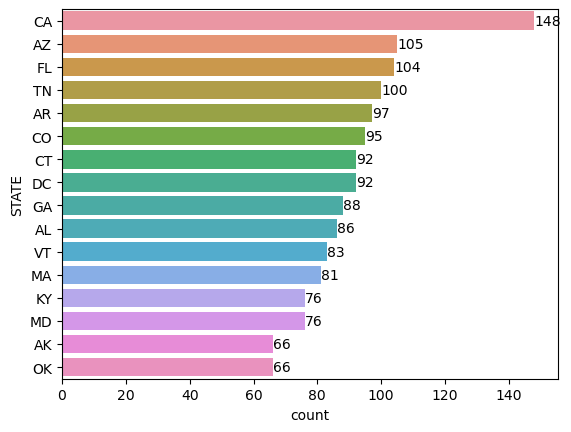

In [29]:
# Finding the Top 5 states with most insurance claimns belonging to high risk customers
top5_high_risk_data = insurance_data[insurance_data["RISK_SEGMENTATION"] == "H"]
ax3 = sns.countplot(y="STATE", data=top5_high_risk_data, order=top5_high_risk_data["STATE"].value_counts().index)
ax3.bar_label(ax3.containers[0])

[Text(0, 0, '431'),
 Text(0, 0, '284'),
 Text(0, 0, '276'),
 Text(0, 0, '269'),
 Text(0, 0, '265'),
 Text(0, 0, '260'),
 Text(0, 0, '251'),
 Text(0, 0, '250'),
 Text(0, 0, '247'),
 Text(0, 0, '239'),
 Text(0, 0, '237'),
 Text(0, 0, '233'),
 Text(0, 0, '232'),
 Text(0, 0, '229'),
 Text(0, 0, '225'),
 Text(0, 0, '222')]

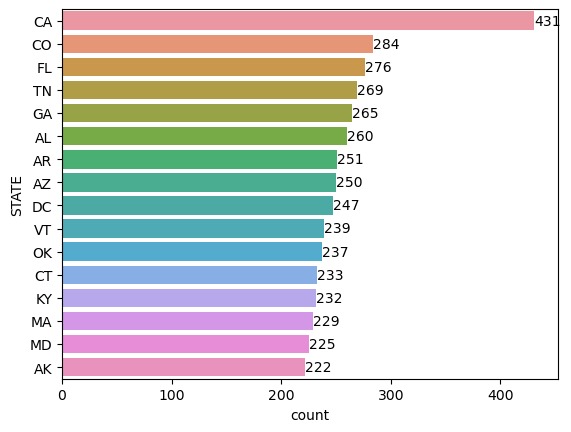

In [30]:
# Finding the Top 5 states with most insurance claimns belonging to medium risk customers
top5_medium_risk_data = insurance_data[insurance_data["RISK_SEGMENTATION"] == "M"]
ax4 = sns.countplot(y="STATE", data=top5_medium_risk_data, order=top5_medium_risk_data["STATE"].value_counts().index)
ax4.bar_label(ax4.containers[0])

[Text(0, 0, '1062'), Text(0, 0, '393')]

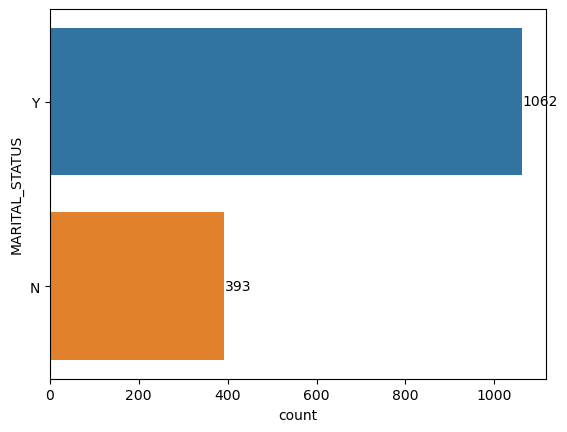

In [31]:
# Finding the distribution of those high risk data with maritial status
ax5 = sns.countplot(y="MARITAL_STATUS", data=top5_high_risk_data, order=top5_high_risk_data["MARITAL_STATUS"].value_counts().index)
ax5.bar_label(ax5.containers[0])

[Text(0, 0, '2956'), Text(0, 0, '1194')]

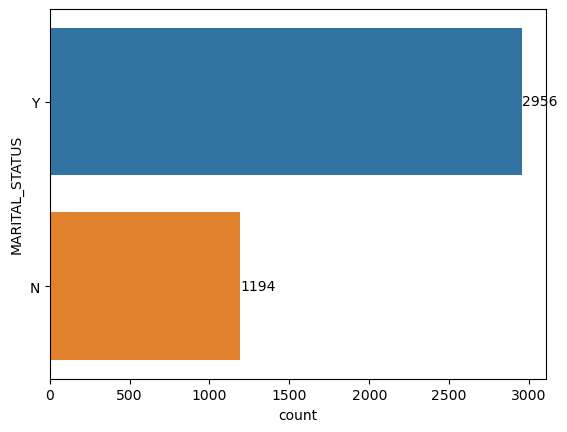

In [32]:
# Finding the distribution of those medium risk data with maritial status
ax6 = sns.countplot(y="MARITAL_STATUS", data=top5_medium_risk_data, order=top5_medium_risk_data["MARITAL_STATUS"].value_counts().index)
ax6.bar_label(ax6.containers[0])

C:\Users\santo\AppData\Local\Temp\ipykernel_5032\2192973485.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax7 = sns.distplot(top5_high_risk_data["AGE"], kde=True)


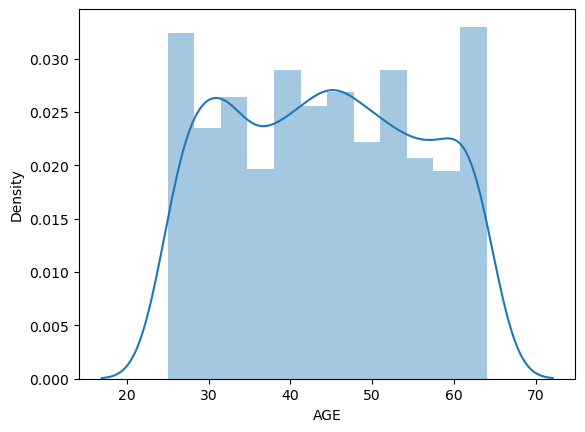

In [33]:
# Finding the distribution of those high risk data with age
ax7 = sns.distplot(top5_high_risk_data["AGE"], kde=True)

[Text(0, 0, '52'),
 Text(0, 0, '48'),
 Text(0, 0, '45'),
 Text(0, 0, '44'),
 Text(0, 0, '43'),
 Text(0, 0, '42'),
 Text(0, 0, '42'),
 Text(0, 0, '40'),
 Text(0, 0, '39'),
 Text(0, 0, '39'),
 Text(0, 0, '39'),
 Text(0, 0, '39'),
 Text(0, 0, '39'),
 Text(0, 0, '39'),
 Text(0, 0, '38'),
 Text(0, 0, '38'),
 Text(0, 0, '38'),
 Text(0, 0, '37'),
 Text(0, 0, '37'),
 Text(0, 0, '37'),
 Text(0, 0, '37'),
 Text(0, 0, '36'),
 Text(0, 0, '36'),
 Text(0, 0, '36'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '34'),
 Text(0, 0, '34'),
 Text(0, 0, '34'),
 Text(0, 0, '33'),
 Text(0, 0, '32'),
 Text(0, 0, '32'),
 Text(0, 0, '32'),
 Text(0, 0, '32'),
 Text(0, 0, '31'),
 Text(0, 0, '31'),
 Text(0, 0, '29'),
 Text(0, 0, '27'),
 Text(0, 0, '24'),
 Text(0, 0, '20')]

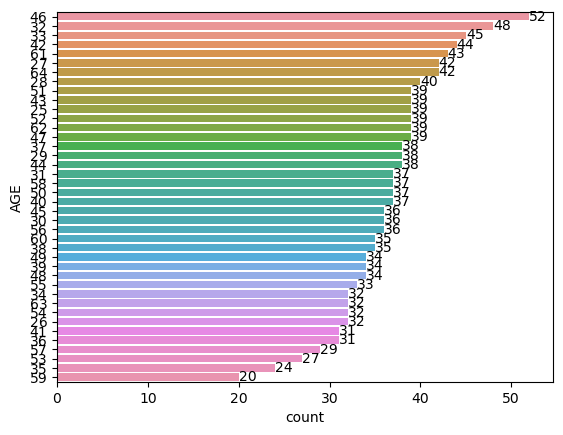

In [34]:
# Finding the distribution of those high risk data with age
ax7 = sns.countplot(y="AGE", data=top5_high_risk_data, order=top5_high_risk_data["AGE"].value_counts().index)
ax7.bar_label(ax7.containers[0])

[Text(0, 0, '257'),
 Text(0, 0, '246'),
 Text(0, 0, '240'),
 Text(0, 0, '238'),
 Text(0, 0, '232'),
 Text(0, 0, '203')]

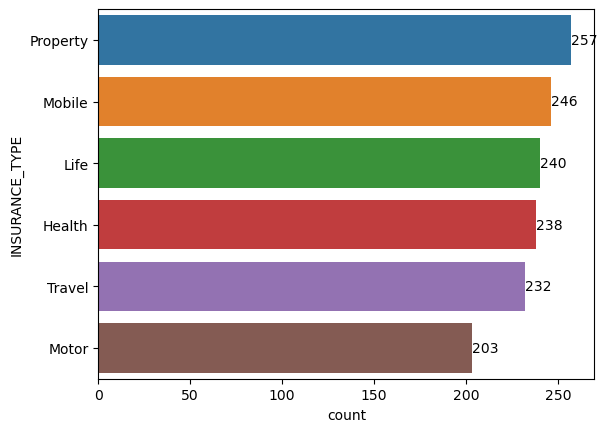

In [35]:
# Distribution of those high risk but in twenties based on insurance type
top5_high_risk_data_twenties = top5_high_risk_data[(top5_high_risk_data["AGE"] > 25) | (top5_high_risk_data["AGE"] > 30)]
ax8 = sns.countplot(y="INSURANCE_TYPE", data=top5_high_risk_data_twenties, order=top5_high_risk_data_twenties["INSURANCE_TYPE"].value_counts().index)
ax8.bar_label(ax8.containers[0])

[Text(0, 0, '482'), Text(0, 0, '482'), Text(0, 0, '452')]

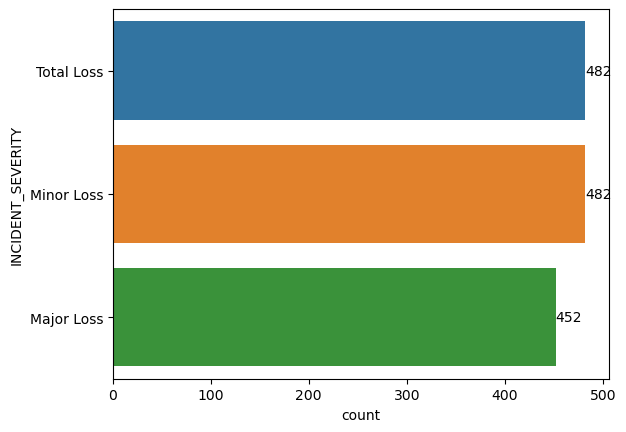

In [36]:
# Distribution of those high risk but in twenties based on severity type
ax9 = sns.countplot(y="INCIDENT_SEVERITY", data=top5_high_risk_data_twenties, order=top5_high_risk_data_twenties["INCIDENT_SEVERITY"].value_counts().index)
ax9.bar_label(ax9.containers[0])

C:\Users\santo\AppData\Local\Temp\ipykernel_5032\2910540866.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax8 = sns.distplot(top5_medium_risk_data["AGE"], kde=True)


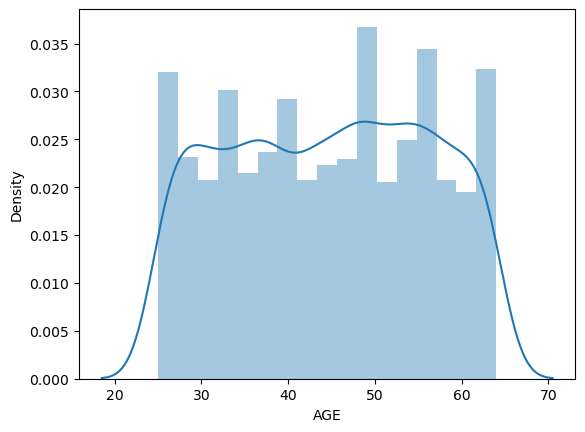

In [37]:
# Finding the distribution of those medium risk data with age
ax8 = sns.distplot(top5_medium_risk_data["AGE"], kde=True)

[Text(0, 0, '125'),
 Text(0, 0, '122'),
 Text(0, 0, '122'),
 Text(0, 0, '121'),
 Text(0, 0, '121'),
 Text(0, 0, '118'),
 Text(0, 0, '117'),
 Text(0, 0, '116'),
 Text(0, 0, '115'),
 Text(0, 0, '112'),
 Text(0, 0, '111'),
 Text(0, 0, '111'),
 Text(0, 0, '107'),
 Text(0, 0, '107'),
 Text(0, 0, '106'),
 Text(0, 0, '105'),
 Text(0, 0, '104'),
 Text(0, 0, '103'),
 Text(0, 0, '102'),
 Text(0, 0, '102'),
 Text(0, 0, '102'),
 Text(0, 0, '101'),
 Text(0, 0, '101'),
 Text(0, 0, '100'),
 Text(0, 0, '100'),
 Text(0, 0, '98'),
 Text(0, 0, '98'),
 Text(0, 0, '96'),
 Text(0, 0, '96'),
 Text(0, 0, '96'),
 Text(0, 0, '96'),
 Text(0, 0, '96'),
 Text(0, 0, '96'),
 Text(0, 0, '94'),
 Text(0, 0, '92'),
 Text(0, 0, '92'),
 Text(0, 0, '91'),
 Text(0, 0, '90'),
 Text(0, 0, '84'),
 Text(0, 0, '84')]

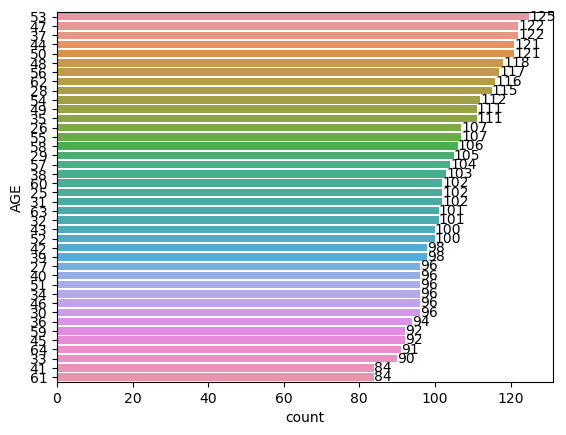

In [38]:
# Finding the distribution of those medium risk data with age
ax8 = sns.countplot(y="AGE", data=top5_medium_risk_data, order=top5_medium_risk_data["AGE"].value_counts().index)
ax8.bar_label(ax8.containers[0])

General Observations - Insurance dataset
1. There are 38 columns in total with mixture of dtypes strint and int/float.
2. Most of the columns do not have missing values less ADDRESS_LINE2, CITY, CUSTOMER_EDUCATION_LEVEL and VENDOR_ID.
3. Columns ADDRESS_LINE2 and VENDOR_ID have the largest number of missing values.
4. The cheapest insurance premium amount is for mobile where the premium paid was $6 but the claim amount was $600 (x100)
5. Based on risk segmentation, the insurance dataset has around ~15% of High risk segmentation customers and Medium and Low risk occupies approximately around 75%.
6. Those in the high risk segment and low risk segment distribution comprises of people who are married (~3x more) than those who are single.
7. The age group for those in high risk segment claims are coming from those in their late twenties (~27 years old) and early sixties (~61-62 years old) --> upon further investigation, we see those in their late twenties are mostly claiming for property related insurance  with total loss on their insurance type
8. Th4e age group for those in medium risk segment claims are coming from those who are much older (~50s, 60s)

## Combining Employee, Vendor and Insurance Data

In [39]:
# Merging all three datasets via outer join as not all claims have vendor
# Joining insurance and employee data - merge on agent id
employee_insurance_merge_data = employee_data.merge(insurance_data, how= 'inner', on= 'AGENT_ID')

# JOINING Vendor  - merge on vendor id
final_data = employee_insurance_merge_data.merge(vendor_data, how= 'outer', on= 'VENDOR_ID')

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10193 entries, 0 to 10192
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGENT_ID                  10000 non-null  object 
 1   AGENT_NAME                10000 non-null  object 
 2   DATE_OF_JOINING           10000 non-null  object 
 3   ADDRESS_LINE1_x           10000 non-null  object 
 4   ADDRESS_LINE2_x           1451 non-null   object 
 5   CITY_x                    9946 non-null   object 
 6   STATE_x                   10000 non-null  object 
 7   POSTAL_CODE_x             10000 non-null  float64
 8   EMP_ROUTING_NUMBER        10000 non-null  float64
 9   EMP_ACCT_NUMBER           10000 non-null  object 
 10  TXN_DATE_TIME             10000 non-null  object 
 11  TRANSACTION_ID            10000 non-null  object 
 12  CUSTOMER_ID               10000 non-null  object 
 13  POLICY_NUMBER             10000 non-null  object 
 14  POLICY

In [40]:
# Find agents who work for more than 2 insurance type claims and sort them via claim amount approved
agent_multiple_claims = final_data.groupby(['AGENT_ID', 'AGENT_NAME', 'CLAIM_AMOUNT'])['INSURANCE_TYPE'].count().reset_index().sort_values('INSURANCE_TYPE', ascending= False)
agent_multiple_claims[:5]

,AGENT_ID,AGENT_NAME,CLAIM_AMOUNT,INSURANCE_TYPE
5429,AGENT00723,Thomas Phariss,5000.0,4
2909,AGENT00385,Sarah Pearce,5000.0,4
3002,AGENT00396,Majorie Holt,3000.0,4
1081,AGENT00147,Brian Webb,700.0,4
1666,AGENT00224,Evelyn Ortiz,3000.0,4


<Axes: >

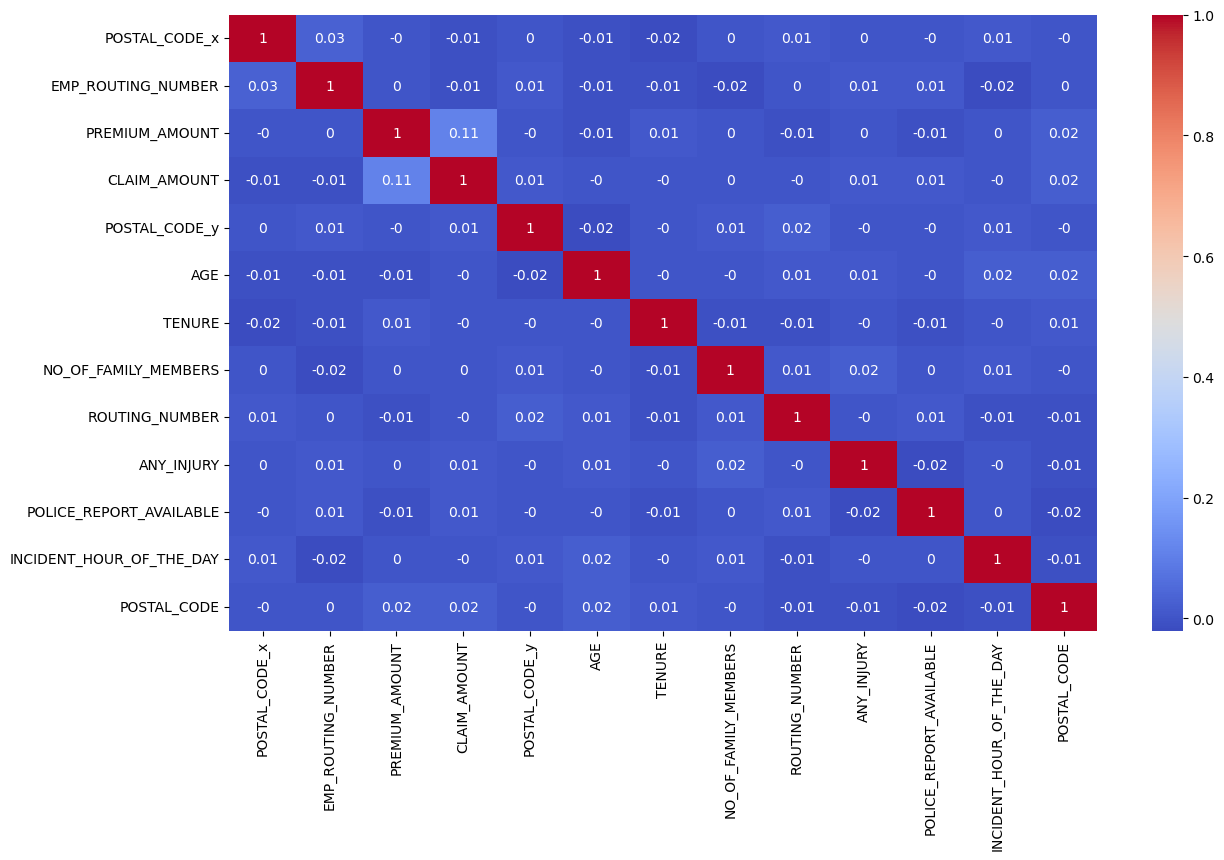

In [41]:
# Finding any correlations between numerical data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
final_data_num = final_data.select_dtypes(include=numerics)

# Plot heatmap
plt.figure(figsize=(14, 8))
corr_matrix = final_data_num.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)


[Text(0, 0, '9497'), Text(0, 0, '503')]

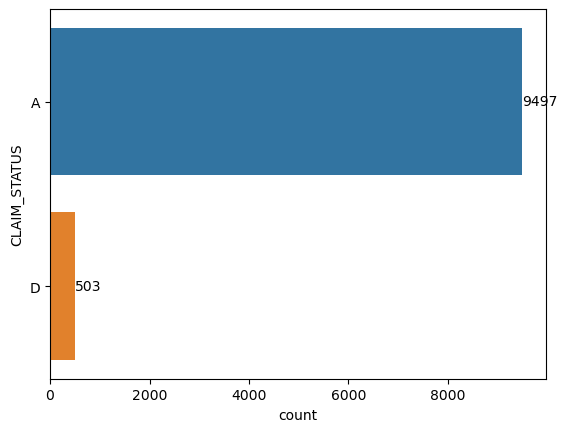

In [42]:
# Distribution of target variable
ax6 = sns.countplot(y="CLAIM_STATUS", data=final_data)
ax6.bar_label(ax6.containers[0])

General Observations - Combined dataset
1. There are 38 columns in total - 10 being integers and 28 being string types
2. Most of the columns have little to no missing values.
3. Columns with missing values are ADDRESS_LINE_2, CITY, CUSTOMER_EDUCATION_LEVEL, INCIDENT_CITY and VENDOR_ID with the latter having the largest missing values
4. The premium amount collected ranges between $6 (min) to $200 (max) with the avg and median being equal to around $88.
5. The cheapest insurance type is coming from mobile insurance
6. The claim amount collected ranges from $100 - $100,000 with the average being aound $16,000
7. The age from ranges from 25 years old to 64 years old (max) with the average being around 44 years old
8. The tenture ranges from 6 years to 119 years (max) with the average being 62.9 years
9. The number of family members range between 1.6 - 7 family members with average of 4.48 family members (usually larger families)
10. Majority have suffered some form of injury (0.69) with most of the time police report being available and on average the injury/incident happens just before noon time
11. The top 3 insurance with the most number of claims are Property, Mobile and Health with the least one being motor.
12. There are 3 risk segmentations (low, medium and high) with the dataset containing mostly low and medium risk (being 4 times more than high risk)
13. The Top 5 states that are having the most insurance claim belonging to High risk segment are: CA (California), AZ (Arizona), Florida (FL), Tennessee (TN) and Arkansas (AR). Majority of these cases are those are married (3 times more)
14. There are insurance agents who have worked for 4 types of insurance and there are some with only 1 type
15. All of the numerical independent variables do not have any correlation with one another.
16. The dependent variable (target variable) - CLAIM_STATUS is very skewed. CLAIM_STATUS A dominates the dataset as compared to CLAIM_STATUS D. Hence we need to ensure when we split the data via stratify splitting to ensure equal ratio of data is available from both classes and train and val splits

## Feature Engineering

### 1. Co-location (Customer State = Incident State = Agent State then 1 else 0)

In [62]:
# Create a new variable by the name of colocation - if the customer state, incident state and agent state is the same 1. Else 0

def colocation(row):
    if (row['STATE_y'] == row['INCIDENT_STATE']) & (row['STATE_y'] == row['STATE_x']):
        val = 1
    else:
        val = 0
    return val

final_data['COLOCATION'] = final_data.apply(colocation, axis= 1)
final_data['COLOCATION'].head()

0    0
1    0
2    0
3    0
4    0
Name: COLOCATION, dtype: int64

## Data Pre-processing

### 1. Drop redundant / correlated columns

In [66]:
# Specify the feature and target col
COLS = list(insurance_data.columns)
TARGET_COL = ["CLAIM_STATUS"]
DATETIME_COLS = ["TXN_DATE_TIME", "POLICY_EFF_DT", "LOSS_DT", "REPORT_DT"]

# Able to retrieve these information from the postal code column
REDUNDANT_COLS = ["ADDRESS_LINE1", "ADDRESS_LINE2", "CITY", "STATE", "POLICY_NUMBER", "TRANSACTION_ID"]

# Numerical cols
NUMERICAL_COLS = ["PREMIUM_AMOUNT", "POSTAL_CODE", "NO_OF_FAMILY_MEMBERS", "ROUTING_NUMBER", "ANY_INJURY", "POLICE_REPORT_AVAILABLE", "INCIDENT_HOUR_OF_THE_DAY", "CLAIM_AMOUNT", "AGE", "TENURE"]

# Final set of feature cols
FEATURE_COLS = [col for col in COLS if col not in TARGET_COL if col not in DATETIME_COLS if col not in REDUNDANT_COLS if col not in NUMERICAL_COLS]

### 2. Transform the categorical columns into numerical columns

In [67]:
# Convert the categorical data into numerical

# Further breakdown of feature cols
ORDINAL_COLS = ["RISK_SEGMENTATION", "SOCIAL_CLASS", "CUSTOMER_EDUCATION_LEVEL", "INCIDENT_SEVERITY"] # has some order
NOMINAL_COLS = [col for col in FEATURE_COLS if col not in ORDINAL_COLS if col not in NUMERICAL_COLS] # has no order

In [68]:
# Checking
assert len(NOMINAL_COLS) + len(ORDINAL_COLS) == len(FEATURE_COLS)

#### a. Transform Ordinal columns
There is some order to these data. Affected columns are RISK_SEGMENTATION, SOCIAL_CLASS, CUSTOMER_EDUCATION_LEVEL and INCIDENT_SEVERITY

In [96]:
# Perform using sklearn ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Instantiate ordincal encoder
ord_enc = OrdinalEncoder()

# Fit and transform the data
X_ord_enc = ord_enc.fit_transform(insurance_data[ORDINAL_COLS])
insurance_data[ORDINAL_COLS] = pd.DataFrame(X_ord_enc, columns=ORDINAL_COLS)
# ordinal_transformed_data = pd.get_dummies(insurance_data,prefix=ORDINAL_COLS,columns=ORDINAL_COLS)

In [115]:
# Perform label encoding for target column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_class = le.fit_transform(insurance_data[TARGET_COL])
insurance_data["TARGET"] = pd.Series(le_class)

d:\miniconda3\envs\amplify_bizcase\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### b. Transform Nominal columns

In [104]:
# Perform using binary encoder - we use binary encoder as if we use ohe it will result in sparse matrix that affects memory when training
import category_encoders as ce

# Instantiate ordincal encoder
be_enc = ce.BinaryEncoder(cols=NOMINAL_COLS)

# Fit and transform the data
insurance_data_nominal_transformer = be_enc.fit_transform(insurance_data[NOMINAL_COLS])
# ordinal_transformed_data = pd.get_dummies(insurance_data,prefix=ORDINAL_COLS,columns=ORDINAL_COLS)

### 3. Combine data after all preprocessing

In [118]:
finale_data = pd.concat([insurance_data[ORDINAL_COLS] , insurance_data_nominal_transformer, insurance_data["TARGET"]],axis=1)
finale_data

,RISK_SEGMENTATION,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,INCIDENT_SEVERITY,CUSTOMER_ID_0,CUSTOMER_ID_1,CUSTOMER_ID_2,CUSTOMER_ID_3,CUSTOMER_ID_4,CUSTOMER_ID_5,...,VENDOR_ID_0,VENDOR_ID_1,VENDOR_ID_2,VENDOR_ID_3,VENDOR_ID_4,VENDOR_ID_5,VENDOR_ID_6,VENDOR_ID_7,VENDOR_ID_8,TARGET
0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,2.0,0.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,2.0,5.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1.0,2.0,4.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,0.0,4.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,2.0,5.0,1.0,1,0,0,1,1,1,...,0,0,0,0,0,0,1,1,0,0
9996,1.0,1.0,4.0,2.0,1,0,0,1,1,1,...,1,0,0,0,1,0,1,1,1,0
9997,2.0,1.0,0.0,0.0,1,0,0,1,1,1,...,0,1,1,0,1,0,0,0,1,0
9998,2.0,2.0,0.0,2.0,1,0,0,1,1,1,...,0,1,1,0,1,0,0,1,1,0


## Train - Test Split

In [119]:
# Stratify Split - Use Cross Validation since dataset is small

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
# Split dataset into features and target variable columns
X = insurance_data.drop("CLAIM_STATUS", axis=1)
y = insurance_data["CLAIM_STATUS"]

In [122]:
# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=2023)

## Modeling

In [11]:
# Random Forest
# XGBoost
# CatBoost

### 1. XGBoost

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [13]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [14]:
# instantiate the xgboost model
xgb_model = XGBClassifier()

In [ ]:
# Fit the training data
xgb_model.fit(X_train, y_train)

In [ ]:
# Get the pred on test data

## Evaluation

In [ ]:
# Use F1-Score (Focus on reducing False Positive). Maximise Precision. Add in confidence score as well

## Deployment

- Deploy model as an API service especially if we need real time inference
- For insurance fraud case, we do not really need real time prediction hence can deploy model as a pipeline for batch prediction (save cost)

## Online Monitoring

- Model performance will suffer from drfit such as data drift or concept drift
- Setup a weekly monitoring tool to measure performance of model on a weekly basis. Set a threshold for the performance. If the performance goes below a certain threshold, perform a retraining via automated pipeline
- Use unsupervised methods for drift detection